# Loading and normalizing datasets

## We load the FashionMNIST Dataset with the following parameters:

### root is the path where the train/test data is stored,
### train specifies training or test dataset,
### download=True downloads the data from the Internet if it's not available at root.
### transform and target_transform specify the feature and label transformations


In [1]:
!pip install ipywidgets

In [2]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [3]:
%matplotlib inline
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



# Iterating and Visualizing the Dataset
### We can index Datasets manually like a list: training_data[index]. 
### We use matplotlib to visualize some samples in our training data.

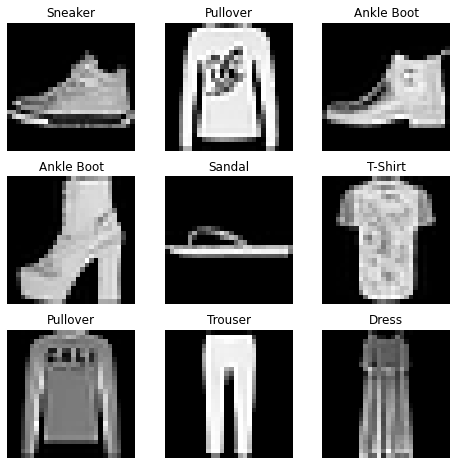

In [4]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

# Preparing your data for training with DataLoaders


### data the training data that will be used to train the model; and test data to evaluate the model
### batch size the number of records to be processed in each batch
### shuffle the randoms sample of the data by indices

In [5]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

# Iterate through the DataLoader


Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


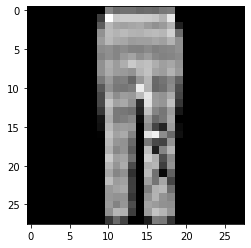

Label: 1


In [6]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

# Normalization

#### Normalization is a common data pre-processing technique that is applied to scale or transform the data 
#### to make sure there's an equal learning contribution from each feature.
#### For example, each pixel in the grayscale images have a value between 0 and 255, which are features.
#### If one pixel value is 17 and another pixel is 197. 
#### There will be an uneven distribution of the pixel importance, because the higher pixel volumes will 
#### deviate the learning. Normalization changes the range of your data, 
#### without distorting its distintion among out feature. This pre-processing is to avoid:

### A reduction of the prediction accuracy
### Difficulty for the model to learn
### Unfavorable distribution of the feature data ranges

# Transforms
### Data does not always come in its final processed form that is required for training machine learning
### algorithms. We use transforms to perform some manipulation of the data and make it suitable for training.

### All TorchVision datasets have two parameters (transform to modify the features and target_transform to 
### modify the labels) that accept callables containing the transformation logic.
### The torchvision.transforms module offers several commonly-used transforms out of the box.

### The FashionMNIST features are in PIL Image format, and the labels are integers. 
### For training, we need the features as normalized tensors, and the labels as one-hot encoded tensors. 
### To make these transformations, we use ToTensor and Lambda.

In [7]:
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

# ToTensor()
### ToTensor converts a PIL image or NumPy ndarray into a FloatTensor and scales the image's pixel intensity 
### values in the range [0., 1.]



# Lambda transforms
### Lambda transforms apply any user-defined lambda function. Here, we define a function to turn the integer
### into a one-hot encoded tensor. It first creates a zero tensor of size 10 (the number of labels in our 
### dataset) and calls scatter which assigns a value=1 on the index as given by the label y. 
### You can also use torch.nn.functional.one_hot as another option to do that.

In [8]:
target_transform = Lambda(lambda y: torch.zeros(
    10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1))